In [2]:
import rasterio
from rasterio.plot import show
import numpy as np
import matplotlib.pyplot as plt

from rasterio.windows import from_bounds
from rasterio.enums import Resampling

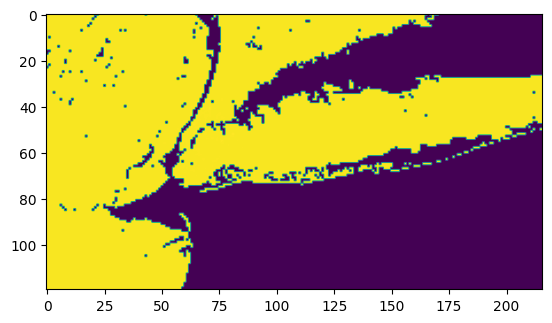

In [10]:
import rasterio
from rasterio.windows import from_bounds
import matplotlib.pyplot as plt

with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/pop_data_small.tif") as src:
    win = from_bounds(-77.1, 40.2, -72.7, 39.0, src.transform)
    bounds = src.window_bounds(win)
    resolution = src.res
    img = src.read(window=win)

# Reshape the image data
img = img.transpose(1, 2, 0)

plt.imshow(img)
plt.show()


In [ ]:
with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/clustered3.tif") as src:
    # win = from_bounds(-74.5, 40.2, -72.7, 41.2, src.transform)
    # bounds = src.window_bounds(win)
    # resolution = src.res
    cls1 = src.read()
    labels = src.read(2)
    d = {}
    for i, row in enumerate(src.read(1)):
        for j, val in enumerate(row):
            if val not in d.keys():
                d[val] = 0 
            else:
                d[val] += 1
            # Print the cluster assignment for each pixel
            # d[val] = 0 if val not in d.keys else d[val]+1
    print(len(d))
    print(d)
    
    

with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/clustered2.tif") as src:
    # win = from_bounds(-74.5, 40.2, -72.7, 41.2, src.transform)
    # bounds = src.window_bounds(win)
    # resolution = src.res
    cls2 = src.read()

LOWER MAP RESOLUTION

In [ ]:
import rasterio
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/usa_ppp_2020.tif") as src:
    win = from_bounds(-90, 30, -68, 44, src.transform)
   
    # Define the desired resolution in meters (e.g., 1 km)
    target_resolution = 1000  # 1 pixel per 1 kilometer


    x_res = src.transform.a * 120 * 1000
    y_res = src.transform.e * 120 * 1000
    target_width = abs(int(win.width * (x_res / target_resolution)))
    target_height = abs(int(win.height * (y_res / target_resolution)))

    # Create an empty array for the resampled data
    resampled_data = src.read(1, window=win, out_shape=(1, target_height, target_width))

    # Update the transformation matrix
    meta = src.meta.copy()
    print()
    meta.update({
        'height': target_height,
        'width': target_width,
        'dtype': resampled_data.dtype,
        'compress': 'deflate',
        'compress_opts': {'level': 9},
        'bounds': rasterio.windows.bounds(win, src.transform)
    })
    meta['transform'] = rasterio.transform.from_bounds(*rasterio.windows.bounds(win, src.transform), width=target_width, height=target_height)
    with rasterio.open('C:/Users/User/PycharmProjects/SafeRoute/pop_data_small.tif', 'w', **meta) as dst:
        dst.write(resampled_data, 1)

In [ ]:
with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/pop_data_small.tif") as src:
    # win = from_bounds(-74.5, 40.2, -72.7, 41.2, src.transform)
    # bounds = src.window_bounds(win)
    # resolution = src.res
    cls4 = src.read()
    print(src.bounds)
show(cls4)

In [ ]:
with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/pop_data_small.tif") as src:
    win = from_bounds(-74.5, 40.2, -72.7, 41.2, src.transform)
    bounds = src.window_bounds(win)
    resolution = src.res
    cls5 = src.read()
    print(src.bounds)
show(cls5)

In [ ]:
np.shape(img)

In [ ]:
show(labels)

In [ ]:
print(labels)

In [ ]:
show(cls2)

In [ ]:
import rasterio
from rasterio.plot import show

with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/clustered3.tif") as src:
    cls1 = src.read()
    show((src, 1), cmap='viridis')
    


In [ ]:
import matplotlib.pyplot as plt
import rasterio

# Open the raster file
with rasterio.open("C:/Users/User/PycharmProjects/SafeRoute/clustered3.tif") as src:
    data = src.read()
    cluster_labels = src.read(2)

# Define the number of clusters to display and the size of each subplot
n_clusters = 50
subplot_size = 2

# Create a new figure and axis object for each subplot
fig, axs = plt.subplots(nrows=10, ncols=5, figsize=(subplot_size * 5, subplot_size * 10))

# Flatten the axis array to iterate over it
axs = axs.flatten()

# Loop over the clusters and plot each one in a separate subplot
for i in range(n_clusters):
    # Create a binary mask for the current cluster
    mask = cluster_labels == i
    
    # Plot the mask in the current subplot
    axs[i].imshow(mask, cmap='gray')
    
    # Set the subplot title to the cluster label
    axs[i].set_title(f'Cluster {i}')
    
    # Remove the x and y tick labels for clarity
    axs[i].set_xticks([])
    axs[i].set_yticks([])
    
# Adjust the spacing between the subplots
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Show the figure
plt.show()
